# Übungsblatt 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 8.1 Visualisieren der Zustände

In [2]:
def calc_next_state(state, time_delta, c, u):
    if callable(u):
        u = u(state)
    return state + time_delta * np.array([state[1], np.sin(state[0]) - c * state[1] + u * np.cos(state[0])])

def simulate(start_state, end_time, time_step=0.01, c=0.05, u=0.1):
    time = 0
    current_state = start_state
    states = {0: start_state}
    while time <= end_time:
        time += time_step
        current_state = calc_next_state(current_state, time_step, c, u)
        states[time] = current_state
    return states

def calculate_positions(states, arm_length):
    positions = {}
    for time, state in states.items():
        positions[time] = np.array([np.sin(state[0]) * arm_length, np.cos(state[0]) * arm_length])
    return positions

In [3]:
def visualize_state(data, title="Zustandsverlauf"):
    fig, ax = plt.subplots()
    ax.plot(data.keys(), data.values(), label=["x1", "x2"])
    ax.set_title(title)
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Zustand")
    ax.legend(loc='upper left')

def visualize_position(data, title="Positionsverlauf"):
    fig, ax = plt.subplots()
    ax.plot(data.keys(), data.values(), label=["x", "y"])
    ax.set_title(title)
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Länge")
    ax.legend(loc='upper left')


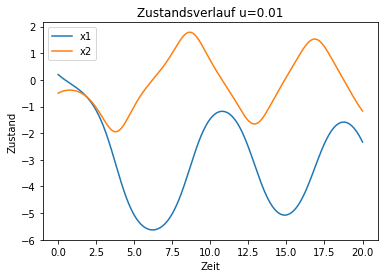

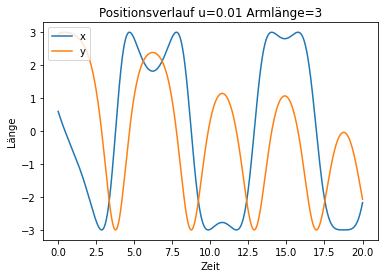

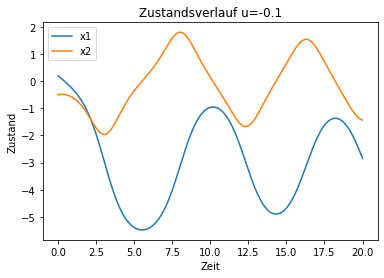

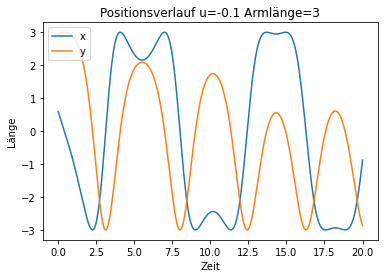

In [4]:
simulation_1 = simulate(np.array([0.2, -0.5]), 20, 0.01, u=0.1)
visualize_state(simulation_1, title="Zustandsverlauf u=0.01")

positions_1 = calculate_positions(simulation_1, 3)
visualize_position(positions_1, title="Positionsverlauf u=0.01 Armlänge=3")

simulation_2 = simulate(np.array([0.2, -0.5]), 20, 0.01, u=-0.1)
visualize_state(simulation_2, title="Zustandsverlauf u=-0.1")

positions_2 = calculate_positions(simulation_2, 3)
visualize_position(positions_2, title="Positionsverlauf u=-0.1 Armlänge=3")

## 8.3) Linearisieren des Systems um Fixpunkt $x_e=(0,0)$

In [5]:
def calc_next_state_lin(state, time_delta, c, u):
    if callable(u):
        u = u(state)

    return state + time_delta * np.array([state[1], -c*state[1] + u])

def simulate_lin(start_state, end_time, time_step=0.01, c=0.05, u=0.1):
    time = 0
    current_state = start_state
    states = {0: start_state}
    while time <= end_time:
        current_state = calc_next_state_lin(current_state, time_step, c, u)
        states[time] = current_state
        time += time_step
    return states

## 8.4) Finden eines Regler

In [6]:
def regulator_for_k2(k2, c=0.05):
    k1 = (c + k2) ** 2 / 4
    def regulator(state):
        return -1 * np.dot(np.array([k1, k2]), state)
    return regulator

## 8.5) Visualisieren des Zustandsverlauf mit Regler

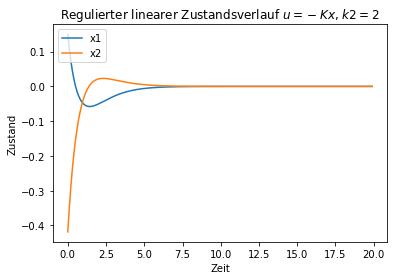

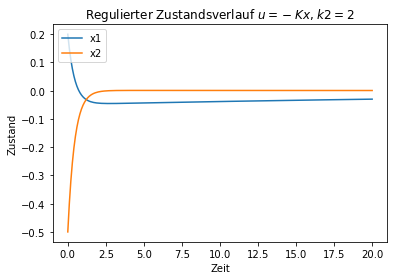

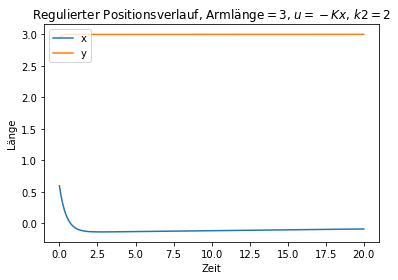

In [7]:
k2 = 2
reg = regulator_for_k2(k2)
t = 20

regulated_simulation_lin = simulate_lin(np.array([0.2, -0.5]), t, 0.1, u=reg)
visualize_state(regulated_simulation_lin, title=f"Regulierter linearer Zustandsverlauf $u=-Kx$, $k2={k2}$")

regulated_simulation = simulate(np.array([0.2, -0.5]), t, 0.1, u=reg)
visualize_state(regulated_simulation, title=f"Regulierter Zustandsverlauf $u=-Kx$, $k2={k2}$")

visualize_position(calculate_positions(regulated_simulation, arm_length=3), f"Regulierter Positionsverlauf, Armlänge$=3$, $u=-Kx$, $k2={k2}$")

## 8.1) Visualiseren des Zustandsverlauf mit Reglervorschrift $u=k(x_1,x_2)$
Reglervorschrift "ausgedacht", $u=k(x_1,x_2)=-1 \cdot (\left(\frac{c + 5}{2}\right)^2\cdot x_1 + 5\cdot x_2)=-1 \cdot (6.375625\cdot x_1 + 5\cdot x_2)$

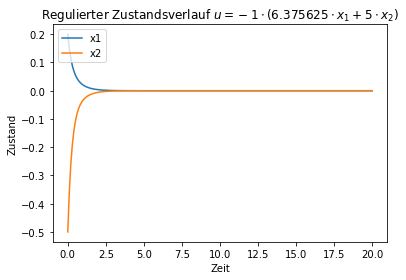

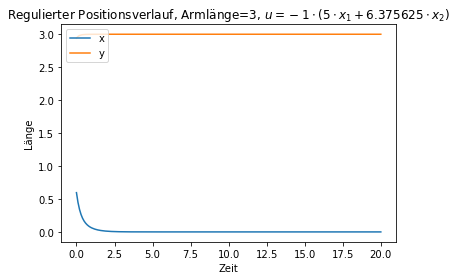

In [8]:
reg = lambda state: -1 * (6.375625 * state[0] + 5 * state[1])

regulated_simulation_2 = simulate(np.array([0.2, -0.5]), t, 0.1, u=reg)
visualize_state(regulated_simulation_2, title="Regulierter Zustandsverlauf $u=-1 \cdot (6.375625\cdot x_1 + 5\cdot x_2)$")

visualize_position(calculate_positions(regulated_simulation_2, arm_length=3), "Regulierter Positionsverlauf, Armlänge=3, $u=-1 \cdot (5\cdot x_1 + 6.375625\cdot x_2)$")